# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key

from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

637


In [17]:
sets = len(cities)/50
sets


12.74

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_test = "New York"
test_url = f"{url}appid={api_key}&units={units}&q={city_test}"

print(test_url)


http://api.openweathermap.org/data/2.5/weather?appid=63395cbd4305b5463c2d303a007dede5&units=imperial&q=New York


In [23]:
cities_df = pd.DataFrame(cities)
cities_df = cities_df.rename(columns={0 : "Name"})
#cities_df

In [24]:
# set up additional columns to hold information

cities_df['country'] = ""
cities_df['latitude'] = ""
cities_df['longitude'] = ""
cities_df['max temperature'] = ""
cities_df['cloudiness'] = ""
cities_df['date'] = ""
cities_df['humidity'] = ""
cities_df['wind speed'] = ""


#cities_df


In [25]:
base_url = f"{url}appid={api_key}&units={units}&q=" 


print("Beginning Data Retrieval")
print("------------------------")

for index, row in cities_df.iterrows():
    
    city_data = row["Name"]
    
    time.sleep(1)
    
    city_response = requests.get(base_url + city_data).json()
    
    try:
        print(f"Processing Record {index} of Set {index} | {city_data}")
        cities_df.loc[index, 'country'] = city_response['sys']['country']
        cities_df.loc[index, 'latitude'] = city_response['coord']['lat']
        cities_df.loc[index, 'longitude'] = city_response['coord']['lon']
        cities_df.loc[index, 'max temperature'] = city_response['main']['temp_max']
        cities_df.loc[index, 'cloudiness'] = city_response['clouds']['all']
        cities_df.loc[index, 'date'] = city_response['dt']
        cities_df.loc[index, 'humidity'] = city_response['main']['humidity']
        cities_df.loc[index, 'wind speed'] = city_response['wind']['speed']
    except KeyError:
        print("City not found. Skipping....")

print("Done")



Beginning Data Retrieval
------------------------
Processing Record 0 of Set 0 | mataura
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 2 | tekeli
Processing Record 3 of Set 3 | saint-augustin
Processing Record 4 of Set 4 | bredasdorp
Processing Record 5 of Set 5 | poum
Processing Record 6 of Set 6 | cherskiy
Processing Record 7 of Set 7 | barentsburg
City not found. Skipping....
Processing Record 8 of Set 8 | wakkanai
Processing Record 9 of Set 9 | port hawkesbury
Processing Record 10 of Set 10 | mullaitivu
City not found. Skipping....
Processing Record 11 of Set 11 | san benito
Processing Record 12 of Set 12 | punta arenas
Processing Record 13 of Set 13 | busselton
Processing Record 14 of Set 14 | isangel
Processing Record 15 of Set 15 | vaini
Processing Record 16 of Set 16 | carnarvon
Processing Record 17 of Set 17 | ambilobe
Processing Record 18 of Set 18 | albany
Processing Record 19 of Set 19 | rikitea
Processing Record 20 of Set 20 | qaanaaq
Processing Recor

Processing Record 178 of Set 178 | antequera
Processing Record 179 of Set 179 | blackwater
Processing Record 180 of Set 180 | kalemie
Processing Record 181 of Set 181 | kodiak
Processing Record 182 of Set 182 | mattru
Processing Record 183 of Set 183 | yulara
Processing Record 184 of Set 184 | khuzhir
Processing Record 185 of Set 185 | georgiyevka
Processing Record 186 of Set 186 | cocachacra
Processing Record 187 of Set 187 | guaraniacu
Processing Record 188 of Set 188 | gurskoye
City not found. Skipping....
Processing Record 189 of Set 189 | braganca
Processing Record 190 of Set 190 | sao jose da coroa grande
Processing Record 191 of Set 191 | castro
Processing Record 192 of Set 192 | paris
Processing Record 193 of Set 193 | boguchany
Processing Record 194 of Set 194 | khandyga
Processing Record 195 of Set 195 | naze
Processing Record 196 of Set 196 | maarianhamina
City not found. Skipping....
Processing Record 197 of Set 197 | astakos
Processing Record 198 of Set 198 | pasighat
Proc

Processing Record 352 of Set 352 | ancud
Processing Record 353 of Set 353 | emerald
Processing Record 354 of Set 354 | kremenki
Processing Record 355 of Set 355 | winnemucca
Processing Record 356 of Set 356 | den helder
Processing Record 357 of Set 357 | north versailles
Processing Record 358 of Set 358 | birjand
Processing Record 359 of Set 359 | longyan
Processing Record 360 of Set 360 | burnie
Processing Record 361 of Set 361 | hasaki
Processing Record 362 of Set 362 | kununurra
Processing Record 363 of Set 363 | dhola
Processing Record 364 of Set 364 | orlik
Processing Record 365 of Set 365 | cao bang
Processing Record 366 of Set 366 | fortuna
Processing Record 367 of Set 367 | oga
Processing Record 368 of Set 368 | iqaluit
Processing Record 369 of Set 369 | yumen
Processing Record 370 of Set 370 | bambanglipuro
Processing Record 371 of Set 371 | kaitangata
Processing Record 372 of Set 372 | angoche
Processing Record 373 of Set 373 | joutseno
Processing Record 374 of Set 374 | prai

Processing Record 530 of Set 530 | lompoc
Processing Record 531 of Set 531 | ajdabiya
Processing Record 532 of Set 532 | mrirt
City not found. Skipping....
Processing Record 533 of Set 533 | arraial do cabo
Processing Record 534 of Set 534 | tawkar
City not found. Skipping....
Processing Record 535 of Set 535 | matamoros
Processing Record 536 of Set 536 | kambove
Processing Record 537 of Set 537 | ozernovskiy
Processing Record 538 of Set 538 | arlit
Processing Record 539 of Set 539 | dunedin
Processing Record 540 of Set 540 | corralillo
Processing Record 541 of Set 541 | rungata
City not found. Skipping....
Processing Record 542 of Set 542 | kurchum
Processing Record 543 of Set 543 | lorengau
Processing Record 544 of Set 544 | liyang
Processing Record 545 of Set 545 | rio pardo de minas
Processing Record 546 of Set 546 | sumbawa
City not found. Skipping....
Processing Record 547 of Set 547 | biu
Processing Record 548 of Set 548 | labutta
City not found. Skipping....
Processing Record 5

In [29]:
cities_df.head()

,Name,country,latitude,longitude,max temperature,cloudiness,date,humidity,wind speed
0,mataura,NZ,-46.19,168.86,44.53,92,1538236855,97,2.48
1,hithadhoo,MV,-0.6,73.08,81.88,92,1538236856,100,9.19
2,tekeli,KZ,44.86,78.76,50.2,0,1538236857,60,3.71
3,saint-augustin,FR,44.83,-0.61,75.2,0,1538235000,38,8.05
4,bredasdorp,ZA,-34.53,20.04,64.4,0,1538233200,52,16.11


In [30]:
cities_df.to_csv("JMCityoutput.csv")

In [32]:
cities_df.count()

Name               637
country            637
latitude           637
longitude          637
max temperature    637
cloudiness         637
date               637
humidity           637
wind speed         637
dtype: int64

In [33]:
cities_df.dtypes

Name               object
country            object
latitude           object
longitude          object
max temperature    object
cloudiness         object
date               object
humidity           object
wind speed         object
dtype: object

In [34]:
city_rec = pd.read_csv("JMcityoutput.csv")
city_rec.head()

,Unnamed: 0,Name,country,latitude,longitude,max temperature,cloudiness,date,humidity,wind speed
0,0,mataura,NZ,-46.19,168.86,44.53,92.0,1.538237e+09,97.0,2.48
1,1,hithadhoo,MV,-0.60,73.08,81.88,92.0,1.538237e+09,100.0,9.19
2,2,tekeli,KZ,44.86,78.76,50.20,0.0,1.538237e+09,60.0,3.71
3,3,saint-augustin,FR,44.83,-0.61,75.20,0.0,1.538235e+09,38.0,8.05
4,4,bredasdorp,ZA,-34.53,20.04,64.40,0.0,1.538233e+09,52.0,16.11


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [35]:
lat = city_rec["latitude"]
humid = city_rec["humidity"]
clouds = city_rec["cloudiness"]
max_temp = city_rec["max temperature"]
wind = city_rec["wind speed"]


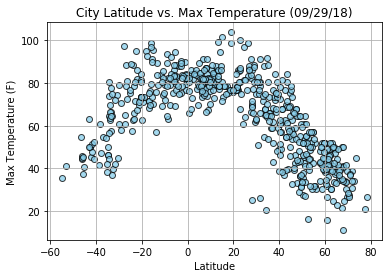

In [55]:
plt.scatter(lat, max_temp, marker = "o", color = "skyblue", alpha = .75, edgecolors = "black")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature (09/29/18)")
plt.grid(True)
plt.savefig("../Images/LatitudeTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

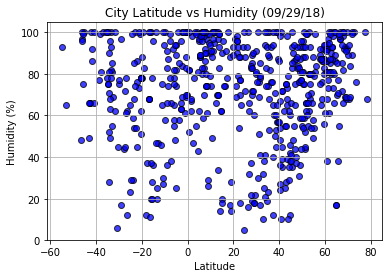

In [54]:
plt.scatter(lat, humid, marker = "o", color = "blue", alpha = .75, edgecolors = "black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (09/29/18)")
plt.savefig("../Images/LatitudeHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

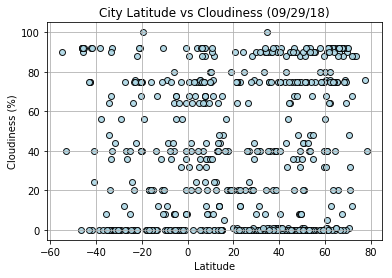

In [52]:
plt.scatter(lat, clouds, marker = "o", color = "lightblue", alpha = .9, edgecolors = "black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (09/29/18)")
plt.savefig("../Images/LatitudeClouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

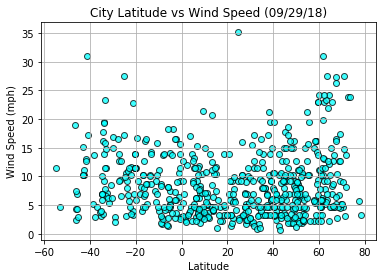

In [51]:
plt.scatter(lat, wind, marker = "o", color = "cyan", alpha = .75, edgecolors = "black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (09/29/18)")
plt.savefig("../Images/LatitudeWind.png")
plt.show()

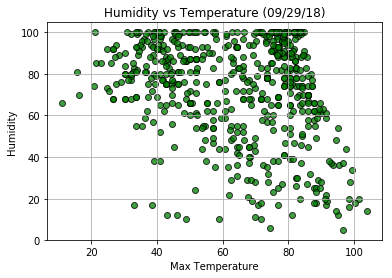

In [50]:
plt.scatter(max_temp, humid, marker = "o", color = "green", alpha = .75, edgecolors = "black")
plt.grid(True)
plt.xlabel("Max Temperature")
plt.ylabel("Humidity")
plt.title("Humidity vs Temperature (09/29/18)")
plt.savefig("../Images/HumidityTemp.png")
plt.show()